
# Energy Profiling and Efficiency Enhancement of Selected Micro-Small-Medium Enterprise in Ilocos Norte, Philippines


## Abstract
This study looked at the daily operations’ energy consumption patterns, assessed corporate operators' energy awareness, and suggested doable plans for cutting use and improving efficiency of MSMEs in Ilocos Norte. By not only identifying areas in need of improvement but also arming MSMEs with the required knowledge to adopt sustainable practices inside their operations. The study demonstrates that with the right knowledge and tools, MSMEs can significantly reduce operational costs and enhance sustainability. Findings support the formulation of localized energy interventions and policies that empower MSMEs to contribute to broader renewable energy and climate goals.


## 📌 **Purpose of this Repository**

This repository serves as a **documentation of the journey behind the data analysis** conducted for my manuscript:

> *“Energy Profiling and Efficiency Enhancement of Selected Micro-Small-Medium Enterprises in Ilocos Norte, Philippines.”*

It includes structured notebooks that outline:

- The **storylines of data cleaning, analysis, and visualization**,  
- Insights that informed the manuscript’s results and discussions, and  
- The process of developing recommendations for MSME energy efficiency and renewable energy adoption.

By sharing this, I aim to provide transparency in my analytical workflow, support reproducibility, and serve as a resource for other researchers working on energy profiling, MSME development, or renewable energy feasibility studies.

---

**Author:** Jomel C. Felix  
**Year:** 2025

---

_For questions or collaborations, kindly reach out via email or GitHub issues._

Pre-Test Mean: 19.71, Standard Deviation: 4.92
Post-Test Mean: 23.91, Standard Deviation: 3.89


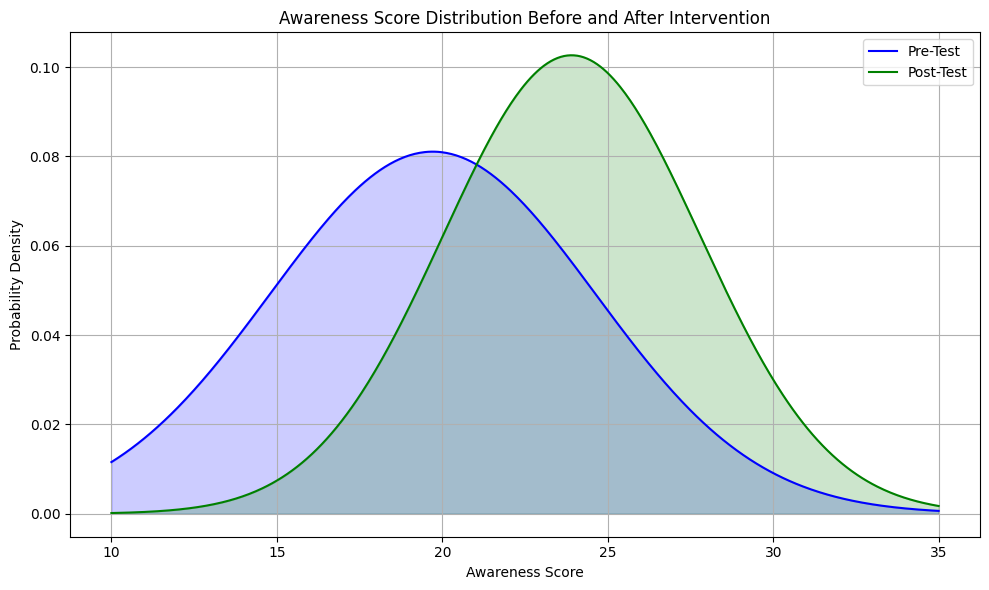

t-statistic = 9.4379
p-value = 0.0000000000
✅ There is a statistically significant improvement in awareness.


In [3]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV 
df = pd.read_csv("energyprofilesummary.csv")  # with outlier
# df = pd.read_csv("energyprofilesummarynooutlier.csv")  # without outlier

# --- Clean and standardize category names
df["business category"] = df["business category"].str.strip().str.lower()

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Correlation analysis 
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map for business categories
color_map = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Plot setup
plt.figure(figsize=(8, 6))

# --- Scatter plot: color-coded by business category
for category, color in color_map.items():
    subset = df[df["business category"] == category]
    plt.scatter(subset["Number_of_Operation_hours"], subset["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Global regression line (for all data)
m, b = np.polyfit(df["Number_of_Operation_hours"], df["DailyUsageKW"], 1)
x_vals = np.array([0, 24])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color="crimson", linewidth=2, label=f"Regression Line (r = {corr:.2f})")

# --- Labels and formatting
plt.xlabel("Operating Hours per Day", fontsize=12)
plt.ylabel("Daily Electricity Use (kWh)", fontsize=12)
plt.title("Daily Electricity Use vs Operating Hours", fontsize=14)
plt.xlim(0, 25)           # Expand axis range
plt.xticks(np.arange(0, 25, 2))  # Show ticks from 0 to 24 only
plt.ylim(bottom=0)        # No negative y-values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Business Category", loc='upper left')
plt.tight_layout()
plt.show()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_rel
df = pd.read_csv("ttest.csv")

mean_pre = df['PretestTotal'].mean()
std_pre = df['PretestTotal'].std()
mean_post = df['PostTestTotal'].mean()
std_post =  df['PostTestTotal'].std()

print(f"Pre-Test Mean: {mean_pre:.2f}, Standard Deviation: {std_pre:.2f}")
print(f"Post-Test Mean: {mean_post:.2f}, Standard Deviation: {std_post:.2f}")

x = np.linspace(10, 35, 500)

# Create the normal distributions (PDFs)
pre_curve = norm.pdf(x, mean_pre, std_pre)
post_curve = norm.pdf(x, mean_post, std_post)

# Plot the bell curves
plt.figure(figsize=(10, 6))
plt.plot(x, pre_curve, label="Pre-Test", color="blue")
plt.plot(x, post_curve, label="Post-Test", color="green")
plt.fill_between(x, pre_curve, color="blue", alpha=0.2)
plt.fill_between(x, post_curve, color="green", alpha=0.2)

# Customize the chart
plt.title("Awareness Score Distribution Before and After Intervention")
plt.xlabel("Awareness Score")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

df_clean = df.dropna(subset=['PretestTotal', 'PostTestTotal'])

# Now rerun the t-test
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(df_clean['PostTestTotal'], df_clean['PretestTotal'])

print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.10f}")

# Optional interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant improvement in awareness.")
else:
    print("❌ No statistically significant difference found.")

Descriptive statistics
        Respondent_code  NoOfOperationDays  DailyUsageKW  \
count       129.000000         129.000000    129.000000   
mean         65.000000           6.410853     15.433818   
std          37.383151           0.956984     35.335025   
min           1.000000           3.000000      0.000000   
25%          33.000000           6.000000      0.775000   
50%          65.000000           7.000000      2.450000   
75%          97.000000           7.000000     16.200000   
max         129.000000           7.000000    330.600000   

       Cooling&VentilationUsage  Entertainment&AudioEquipmentUsage  \
count                129.000000                         129.000000   
mean                   2.194283                           0.872965   
std                    6.305547                           4.871937   
min                    0.000000                           0.000000   
25%                    0.037500                           0.000000   
50%                    0

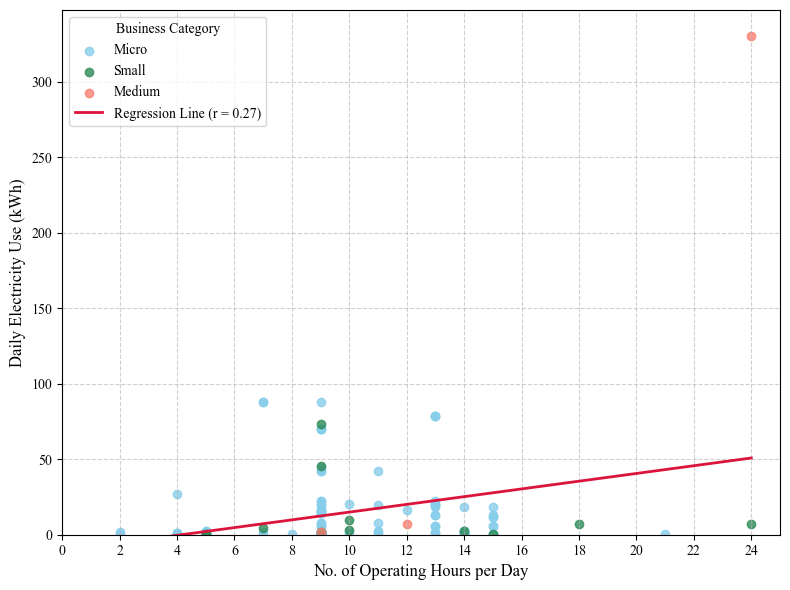

In [30]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV 
df = pd.read_csv("energyprofilesummary.csv")  # with outlier
# df = pd.read_csv("energyprofilesummarynooutlier.csv")  # without outlier

# --- Clean and standardize category names
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Correlation analysis 
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map for business categories
color_map = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Plot setup
plt.figure(figsize=(8, 6))

# --- Scatter plot: color-coded by business category
for category, color in color_map.items():
    subset = df[df["business category"] == category]
    plt.scatter(subset["Number_of_Operation_hours"], subset["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Global regression line (for all data)
m, b = np.polyfit(df["Number_of_Operation_hours"], df["DailyUsageKW"], 1)
x_vals = np.array([0, 24])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color="crimson", linewidth=2, label=f"Regression Line (r = {corr:.2f})")

# --- Labels and formatting
plt.xlabel("No. of Operating Hours per Day", fontsize=12)
plt.ylabel("Daily Electricity Use (kWh)", fontsize=12)
#plt.title("Daily Electricity Use vs No. of Operating Hours Per Day", fontsize=14)
plt.xlim(0, 25)           # Expand axis range
plt.xticks(np.arange(0, 25, 2))  # Show ticks from 0 to 24 only
plt.ylim(bottom=0)        # No negative y-values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Business Category", loc='upper left')
plt.tight_layout()
plt.show()




C:\Users\Jom\AppData\Local\Temp\ipykernel_14740\2984213820.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_labels = heatmap_data.applymap(lambda x: f"{x:.2f} kWh")


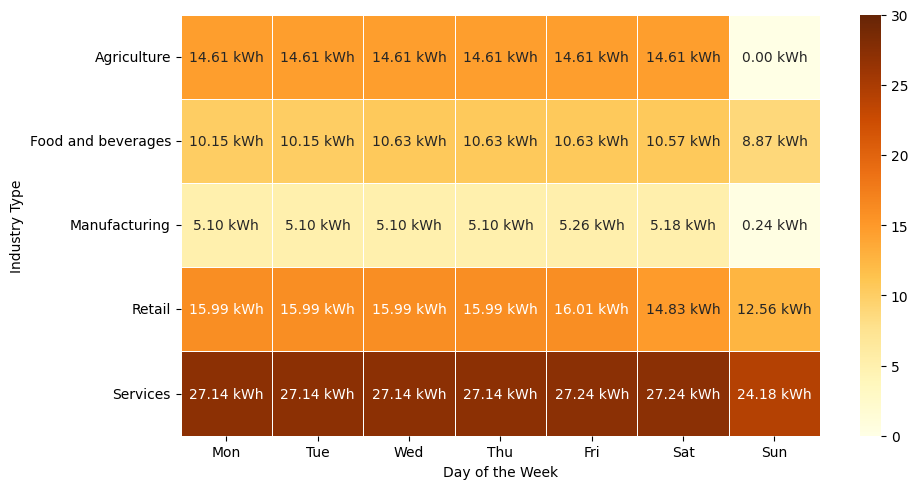

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("weeklypattern3.csv")

# Define usage columns and melt
usage_columns = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df_melted = df.melt(id_vars="Industry Type", value_vars=usage_columns,
                    var_name="Day", value_name="kWh_Usage")

# Group and pivot
grouped = df_melted.groupby(["Industry Type", "Day"])["kWh_Usage"].mean().reset_index()
heatmap_data = grouped.pivot(index="Industry Type", columns="Day", values="kWh_Usage")

# Ensure correct order
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
heatmap_data = heatmap_data[day_order]

# Create annotation labels with "kW"
annot_labels = heatmap_data.applymap(lambda x: f"{x:.2f} kWh")

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data, 
    annot=annot_labels, 
    fmt="",            
    cmap="YlOrBr", 
    linewidths=.5,
    vmin=0,            # minimum value for color scale
    vmax=30            # maximum value for color scale
)

plt.ylabel("Industry Type")
plt.xlabel("Day of the Week")
plt.tight_layout()
plt.show()


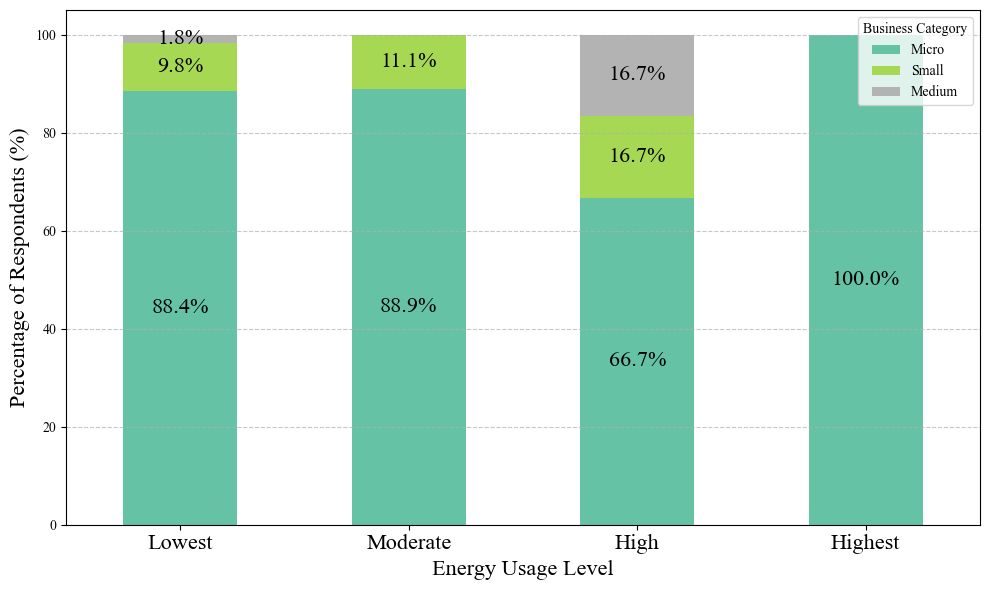

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# Set global font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Energy usage bands
bands = ['Lowest', 'Moderate', 'High', 'Highest']

# Data for business categories
micro = [99, 8, 4, 2]
small = [11, 1, 1, 0]
medium = [2, 0, 1, 0]

# DataFrame creation
df = pd.DataFrame({
    'Micro': micro,
    'Small': small,
    'Medium': medium
}, index=bands)

# Calculate row sums
row_sums = df.sum(axis=1)

# Normalize to percentages
df_percent = df.div(row_sums, axis=0) * 100

# Plot
ax = df_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Title and labels
plt.xlabel('Energy Usage Level', fontsize=16)
plt.ylabel('Percentage of Respondents (%)', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.legend(title='Business Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels only
for bars, percents in zip(ax.containers, df_percent.T.values):
    for bar, perc in zip(bars, percents):
        if perc > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{perc:.1f}%',
                ha='center', va='center',
                fontsize=16
            )

plt.show()


Descriptive statistics
        Respondent_code  NoOfOperationDays  DailyUsageKW  \
count       129.000000         129.000000    129.000000   
mean         65.000000           6.410853     15.433818   
std          37.383151           0.956984     35.335025   
min           1.000000           3.000000      0.000000   
25%          33.000000           6.000000      0.775000   
50%          65.000000           7.000000      2.450000   
75%          97.000000           7.000000     16.200000   
max         129.000000           7.000000    330.600000   

       Cooling&VentilationUsage  Entertainment&AudioEquipmentUsage  \
count                129.000000                         129.000000   
mean                   2.194283                           0.872965   
std                    6.305547                           4.871937   
min                    0.000000                           0.000000   
25%                    0.037500                           0.000000   
50%                    0

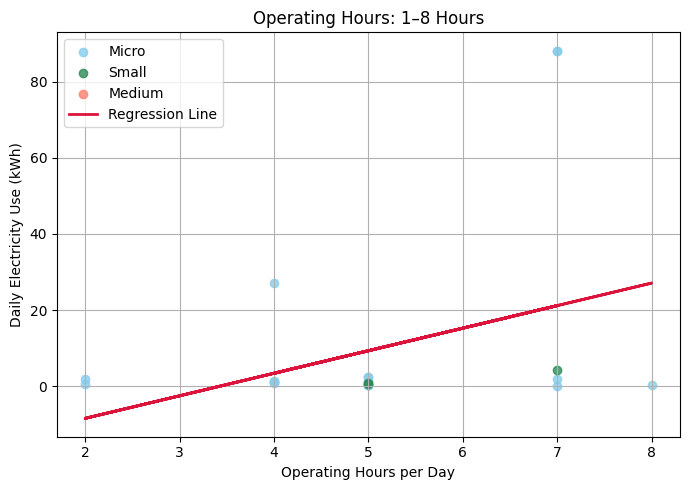

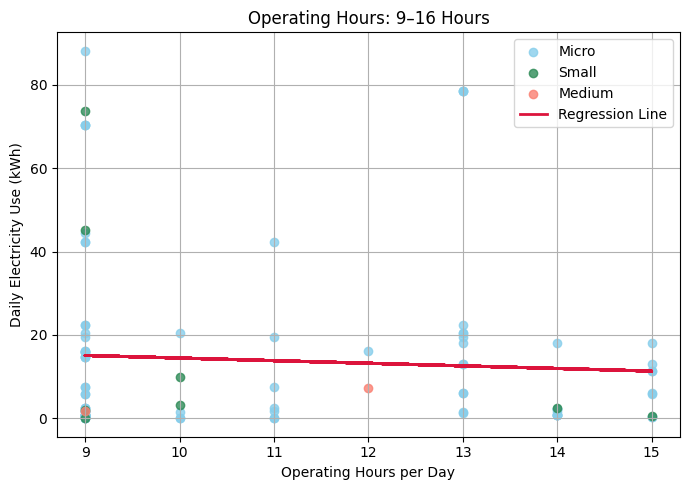

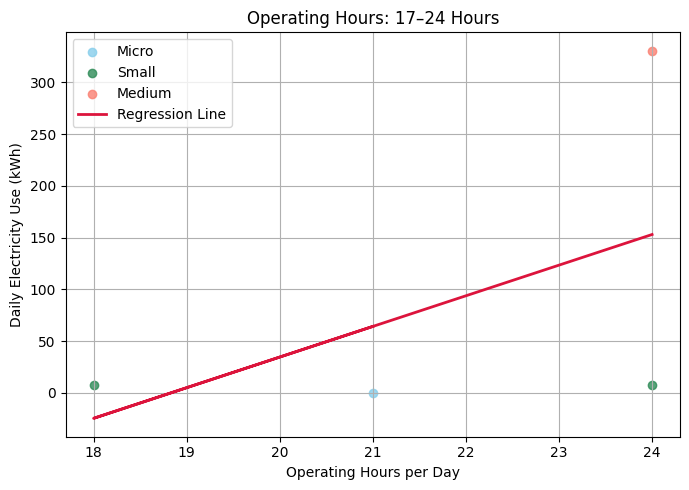

In [4]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV 
df = pd.read_csv("energyprofilesummary.csv")

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Correlation analysis 
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map for business category
category_colors = {
    "Micro": "skyblue",
    "Small": "seagreen",
    "Medium": "salmon"
}

# --- Function to plot scatter with regression line
def plot_group(df_group, group_label):
    plt.figure(figsize=(7,5))
    for category, color in category_colors.items():
        sub_df = df_group[df_group["Business_Category_(Asset):"] == category]
        plt.scatter(sub_df["Number_of_Operation_hours"], sub_df["DailyUsageKW"], 
                    label=category.capitalize(), color=color, alpha=0.8)

    # Regression line (if there are enough points)
    if len(df_group) >= 2:
        m, b = np.polyfit(df_group["Number_of_Operation_hours"], df_group["DailyUsageKW"], 1)
        plt.plot(df_group["Number_of_Operation_hours"], m*df_group["Number_of_Operation_hours"]+b, 
                 color="crimson", linewidth=2, label="Regression Line")

    plt.xlabel("Operating Hours per Day")
    plt.ylabel("Daily Electricity Use (kWh)")
    plt.title(f"Operating Hours: {group_label}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Split dataset by operation hours
group1 = df[(df["Number_of_Operation_hours"] >= 1) & (df["Number_of_Operation_hours"] <= 8)]
group2 = df[(df["Number_of_Operation_hours"] >= 9) & (df["Number_of_Operation_hours"] <= 16)]
group3 = df[(df["Number_of_Operation_hours"] >= 17) & (df["Number_of_Operation_hours"] <= 24)]

# --- Generate scatter plots for each group
plot_group(group1, "1–8 Hours")
plot_group(group2, "9–16 Hours")
plot_group(group3, "17–24 Hours")


Descriptive statistics
        Respondent_code  NoOfOperationDays  DailyUsageKW  \
count       129.000000         129.000000    129.000000   
mean         65.000000           6.410853     15.433818   
std          37.383151           0.956984     35.335025   
min           1.000000           3.000000      0.000000   
25%          33.000000           6.000000      0.775000   
50%          65.000000           7.000000      2.450000   
75%          97.000000           7.000000     16.200000   
max         129.000000           7.000000    330.600000   

       Cooling&VentilationUsage  Entertainment&AudioEquipmentUsage  \
count                129.000000                         129.000000   
mean                   2.194283                           0.872965   
std                    6.305547                           4.871937   
min                    0.000000                           0.000000   
25%                    0.037500                           0.000000   
50%                    0

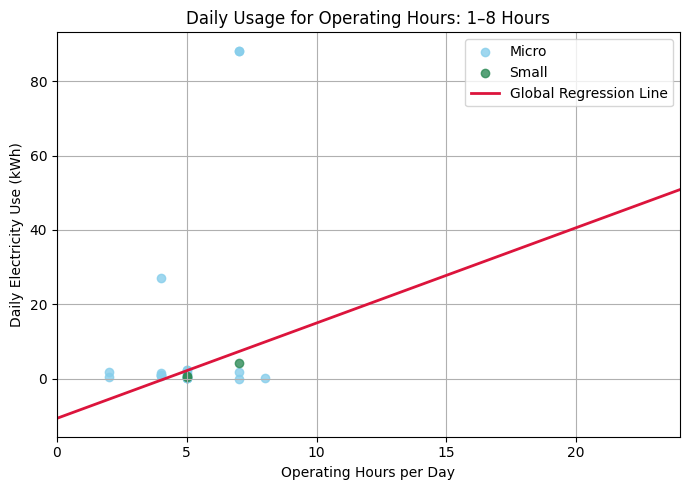

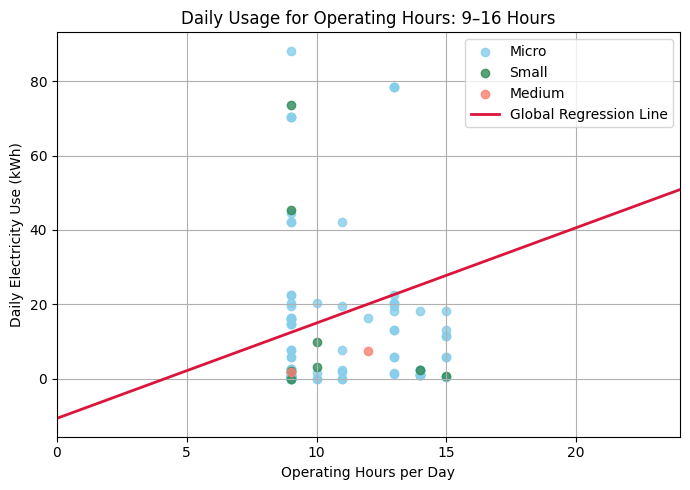

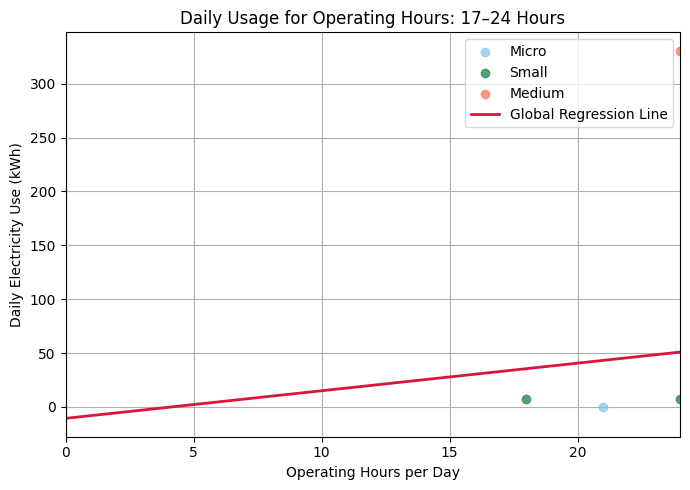

In [5]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV 
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Correlation analysis 
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Global regression line based on full dataset
m_global, b_global = np.polyfit(df["Number_of_Operation_hours"], df["DailyUsageKW"], 1)

# --- Plot function
def plot_grouped_subset(group_filter, group_label):
    plt.figure(figsize=(7, 5))

    # Filter based on group
    df_group = df[group_filter]
    
    # Plot each business category within the filtered group
    for category, color in category_colors.items():
        sub_df = df_group[df_group["business category"] == category]
        if not sub_df.empty:
            plt.scatter(sub_df["Number_of_Operation_hours"], sub_df["DailyUsageKW"], 
                        label=category.capitalize(), color=color, alpha=0.8)

    # Plot global regression line
    x_vals = np.array([0, 24])
    plt.plot(x_vals, m_global * x_vals + b_global, color="crimson", linewidth=2, label="Global Regression Line")

    # Labeling and style
    plt.xlabel("Operating Hours per Day")
    plt.ylabel("Daily Electricity Use (kWh)")
    plt.title(f"Daily Usage for Operating Hours: {group_label}")
    plt.xlim(0, 24)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Create group filters
group1_filter = (df["Number_of_Operation_hours"] >= 1) & (df["Number_of_Operation_hours"] <= 8)
group2_filter = (df["Number_of_Operation_hours"] >= 9) & (df["Number_of_Operation_hours"] <= 16)
group3_filter = (df["Number_of_Operation_hours"] >= 17) & (df["Number_of_Operation_hours"] <= 24)

# --- Plot the 3 groups with consistent x-axis
plot_grouped_subset(group1_filter, "1–8 Hours")
plot_grouped_subset(group2_filter, "9–16 Hours")
plot_grouped_subset(group3_filter, "17–24 Hours")


Descriptive statistics
        Respondent_code  NoOfOperationDays  DailyUsageKW  \
count       129.000000         129.000000    129.000000   
mean         65.000000           6.410853     15.433818   
std          37.383151           0.956984     35.335025   
min           1.000000           3.000000      0.000000   
25%          33.000000           6.000000      0.775000   
50%          65.000000           7.000000      2.450000   
75%          97.000000           7.000000     16.200000   
max         129.000000           7.000000    330.600000   

       Cooling&VentilationUsage  Entertainment&AudioEquipmentUsage  \
count                129.000000                         129.000000   
mean                   2.194283                           0.872965   
std                    6.305547                           4.871937   
min                    0.000000                           0.000000   
25%                    0.037500                           0.000000   
50%                    0

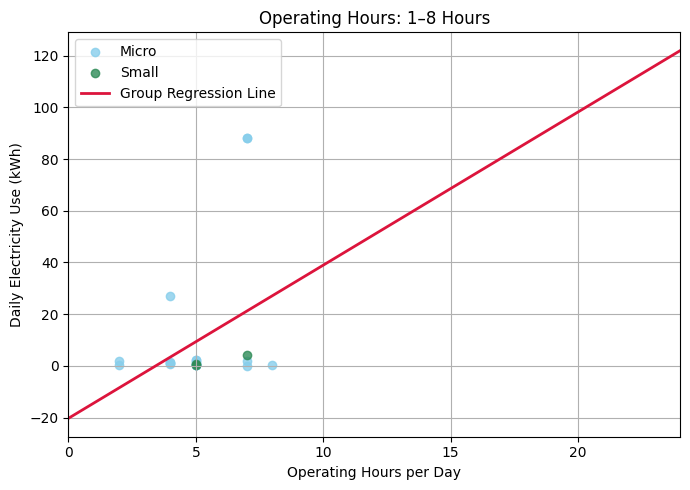

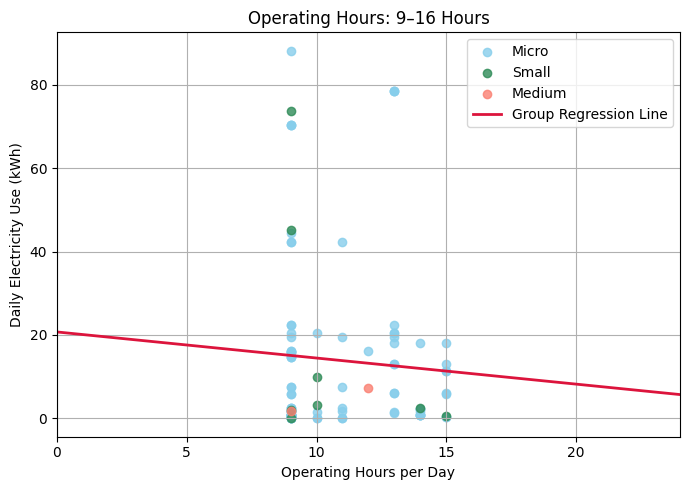

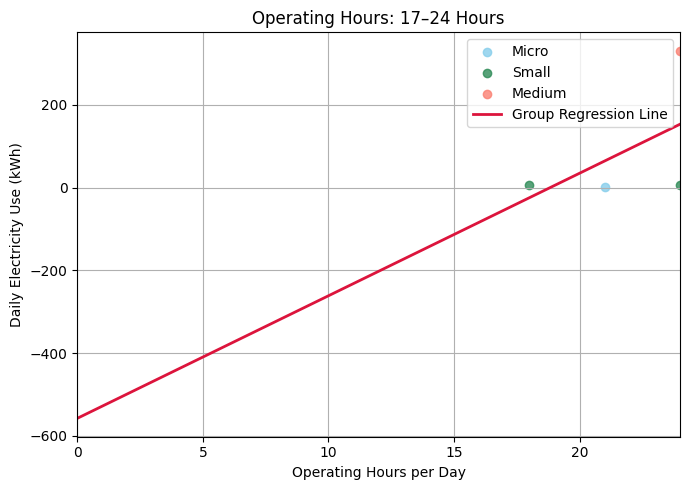

In [6]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Check correlation on full dataset (optional)
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r (all data) = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Plot function
def plot_grouped_subset(df_group, group_label):
    plt.figure(figsize=(7, 5))

    # Plot scatter per business category
    for category, color in category_colors.items():
        sub_df = df_group[df_group["business category"] == category]
        if not sub_df.empty:
            plt.scatter(sub_df["Number_of_Operation_hours"], sub_df["DailyUsageKW"], 
                        label=category.capitalize(), color=color, alpha=0.8)

    # Plot regression line for this subset
    if len(df_group) >= 2:
        m, b = np.polyfit(df_group["Number_of_Operation_hours"], df_group["DailyUsageKW"], 1)
        x_vals = np.array([0, 24])
        y_vals = m * x_vals + b
        plt.plot(x_vals, y_vals, color="crimson", linewidth=2, label="Group Regression Line")

    # Plot settings
    plt.xlabel("Operating Hours per Day")
    plt.ylabel("Daily Electricity Use (kWh)")
    plt.title(f"Operating Hours: {group_label}")
    plt.xlim(0, 24)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Create groups by hours
group1 = df[(df["Number_of_Operation_hours"] >= 1) & (df["Number_of_Operation_hours"] <= 8)]
group2 = df[(df["Number_of_Operation_hours"] >= 9) & (df["Number_of_Operation_hours"] <= 16)]
group3 = df[(df["Number_of_Operation_hours"] >= 17) & (df["Number_of_Operation_hours"] <= 24)]

# --- Plot each group
plot_grouped_subset(group1, "1–8 Hours")
plot_grouped_subset(group2, "9–16 Hours")
plot_grouped_subset(group3, "17–24 Hours")


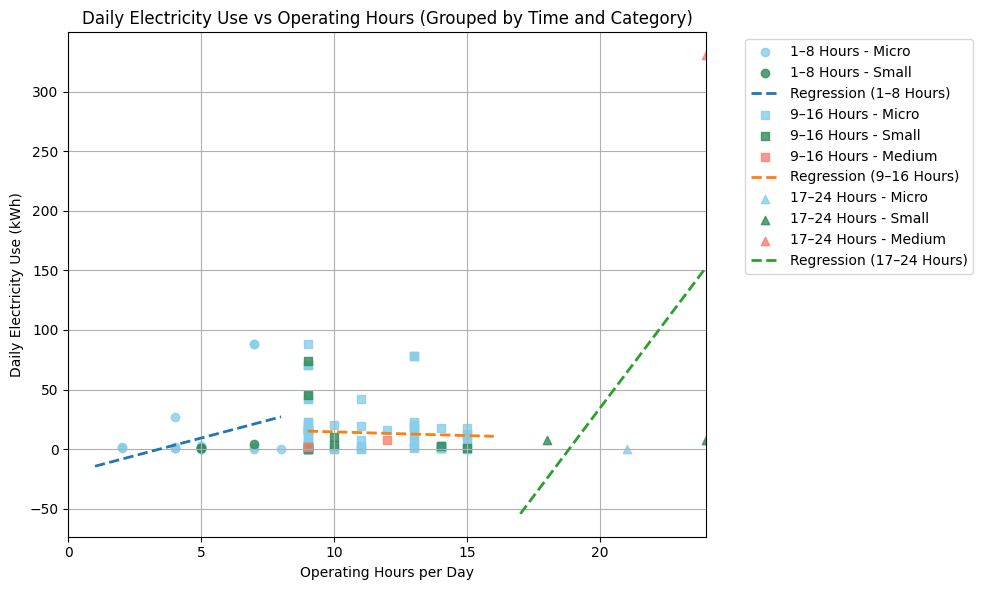

In [7]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Define color and marker map
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

group_bins = [
    (1, 8, "1–8 Hours", "o"),
    (9, 16, "9–16 Hours", "s"),
    (17, 24, "17–24 Hours", "^")
]

# --- Create the plot
plt.figure(figsize=(10, 6))

# Loop through each hour group
for min_hr, max_hr, group_label, marker in group_bins:
    group_df = df[(df["Number_of_Operation_hours"] >= min_hr) & (df["Number_of_Operation_hours"] <= max_hr)]
    
    # Plot each business category within this group
    for category, color in category_colors.items():
        cat_df = group_df[group_df["business category"] == category]
        if not cat_df.empty:
            plt.scatter(cat_df["Number_of_Operation_hours"], cat_df["DailyUsageKW"],
                        label=f"{group_label} - {category.capitalize()}",
                        color=color, marker=marker, alpha=0.8)

    # Regression line for this group
    if len(group_df) >= 2:
        m, b = np.polyfit(group_df["Number_of_Operation_hours"], group_df["DailyUsageKW"], 1)
        x_vals = np.array([min_hr, max_hr])
        y_vals = m * x_vals + b
        plt.plot(x_vals, y_vals, label=f"Regression ({group_label})", linestyle="--", linewidth=2)

# Final plot settings
plt.xlabel("Operating Hours per Day")
plt.ylabel("Daily Electricity Use (kWh)")
plt.title("Daily Electricity Use vs Operating Hours (Grouped by Time and Category)")
plt.xlim(0, 24)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


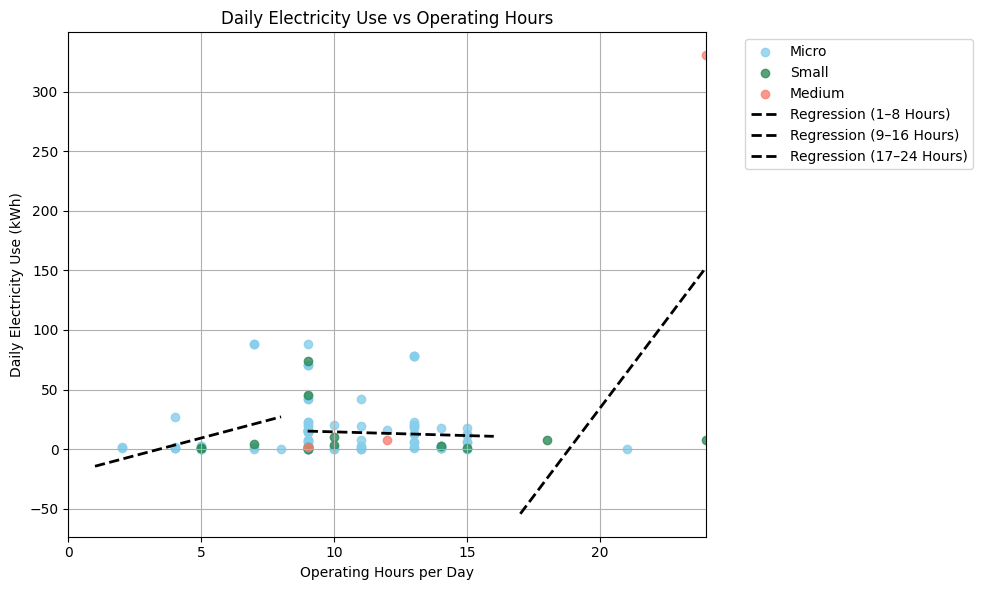

In [9]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Define color map for business category
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Start the plot|
plt.figure(figsize=(10, 6))

# --- Plot all data points (same marker shape, color by business category)
for category, color in category_colors.items():
    cat_df = df[df["business category"] == category]
    plt.scatter(cat_df["Number_of_Operation_hours"], cat_df["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Define hour groups and draw regression lines per group
hour_groups = [
    (1, 8, "1–8 Hours"),
    (9, 16, "9–16 Hours"),
    (17, 24, "17–24 Hours")
]

for min_hr, max_hr, label in hour_groups:
    group_df = df[(df["Number_of_Operation_hours"] >= min_hr) & (df["Number_of_Operation_hours"] <= max_hr)]
    if len(group_df) >= 2:
        m, b = np.polyfit(group_df["Number_of_Operation_hours"], group_df["DailyUsageKW"], 1)
        x_vals = np.array([min_hr, max_hr])
        y_vals = m * x_vals + b
        plt.plot(x_vals, y_vals, linestyle="--", linewidth=2, label=f"Regression ({label})", color='black')

# --- Final plot settings
plt.xlabel("Operating Hours per Day")
plt.ylabel("Daily Electricity Use (kWh)")
plt.title("Daily Electricity Use vs Operating Hours")
plt.xlim(0, 24)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\Jom\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\pyplot.py'>

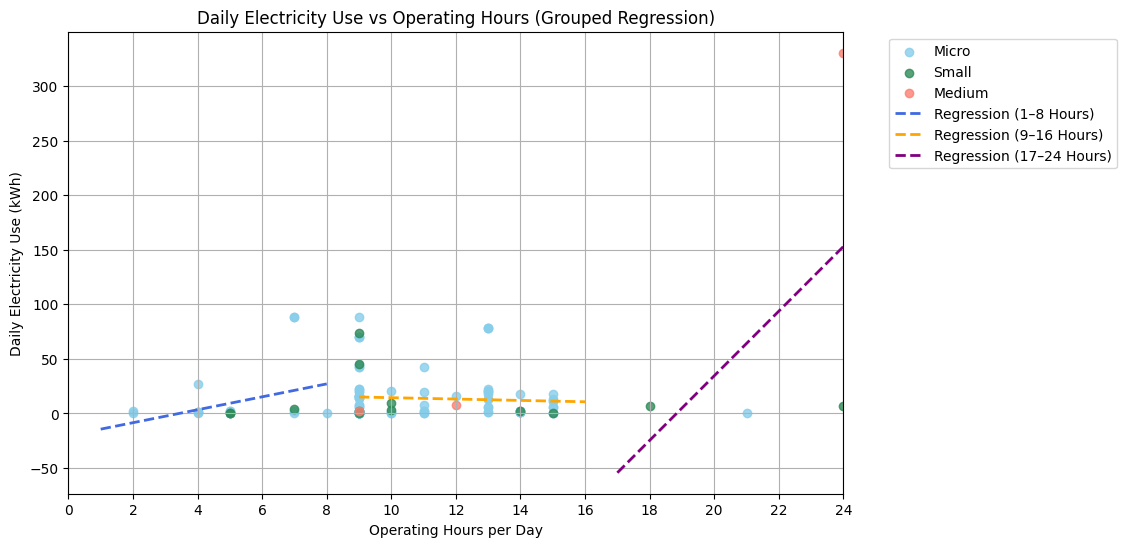

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your CSV
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Define color map for business category
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Define color map for regression lines per hour group
regression_colors = {
    "1–8 Hours": "royalblue",
    "9–16 Hours": "orange",
    "17–24 Hours": "purple"
}

# --- Create the plot
plt.figure(figsize=(10, 6))

# --- Plot all points (circle markers), color-coded by business category
for category, color in category_colors.items():
    cat_df = df[df["business category"] == category]
    plt.scatter(cat_df["Number_of_Operation_hours"], cat_df["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Define hour groups and regression lines
hour_groups = [
    (1, 8, "1–8 Hours"),
    (9, 16, "9–16 Hours"),
    (17, 24, "17–24 Hours")
]

for min_hr, max_hr, label in hour_groups:
    group_df = df[(df["Number_of_Operation_hours"] >= min_hr) & (df["Number_of_Operation_hours"] <= max_hr)]
    if len(group_df) >= 2:
        m, b = np.polyfit(group_df["Number_of_Operation_hours"], group_df["DailyUsageKW"], 1)
        x_vals = np.array([min_hr, max_hr])
        y_vals = m * x_vals + b
        plt.plot(x_vals, y_vals, linestyle="--", linewidth=2,
                 label=f"Regression ({label})", color=regression_colors[label])

# --- Final plot settings
plt.xlabel("Operating Hours per Day")
plt.ylabel("Daily Electricity Use (kWh)")
plt.title("Daily Electricity Use vs Operating Hours (Grouped Regression)")
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 2))  # show 24 explicitly
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt


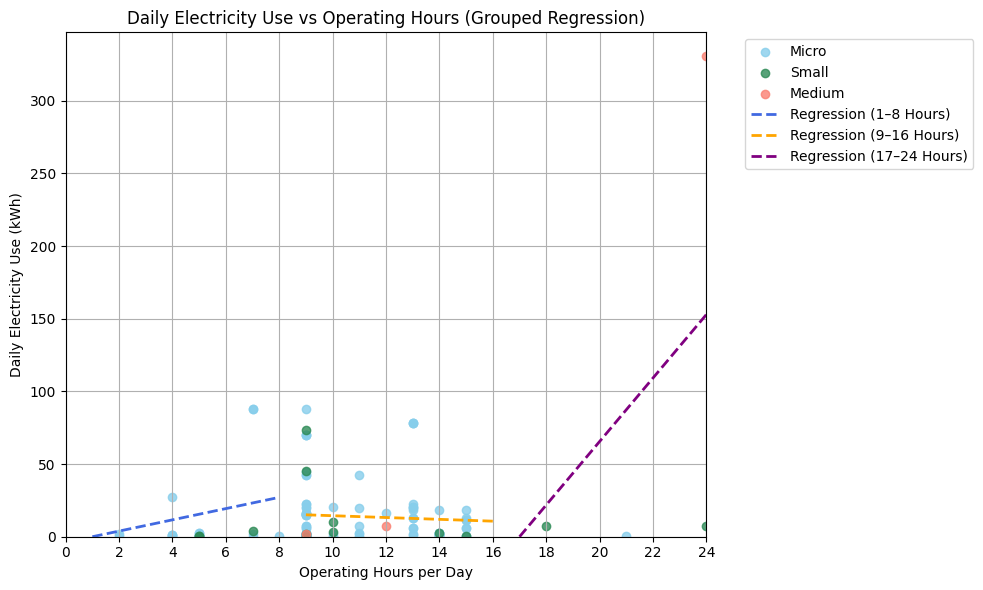

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your CSV
df = pd.read_csv("energyprofilesummary.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Define color map for business category
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Define color map for regression lines per hour group
regression_colors = {
    "1–8 Hours": "royalblue",
    "9–16 Hours": "orange",
    "17–24 Hours": "purple"
}

# --- Create the plot
plt.figure(figsize=(10, 6))

# --- Plot all points (circle markers), color-coded by business category
for category, color in category_colors.items():
    cat_df = df[df["business category"] == category]
    plt.scatter(cat_df["Number_of_Operation_hours"], cat_df["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Define hour groups and regression lines
hour_groups = [
    (1, 8, "1–8 Hours"),
    (9, 16, "9–16 Hours"),
    (17, 24, "17–24 Hours")
]

for min_hr, max_hr, label in hour_groups:
    group_df = df[(df["Number_of_Operation_hours"] >= min_hr) & (df["Number_of_Operation_hours"] <= max_hr)]
    if len(group_df) >= 2:
        m, b = np.polyfit(group_df["Number_of_Operation_hours"], group_df["DailyUsageKW"], 1)
        x_vals = np.array([min_hr, max_hr])
        y_vals = m * x_vals + b
        # Ensure y values are not negative
        y_vals = np.maximum(y_vals, 0)
        plt.plot(x_vals, y_vals, linestyle="--", linewidth=2,
                 label=f"Regression ({label})", color=regression_colors[label])

# --- Final plot settings
plt.xlabel("Operating Hours per Day")
plt.ylabel("Daily Electricity Use (kWh)")
plt.title("Daily Electricity Use vs Operating Hours (Grouped Regression)")
plt.xlim(0, 24)
plt.ylim(0)  # <- Prevent negative y-values
plt.xticks(np.arange(0, 25, 2))  # show 24 explicitly
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


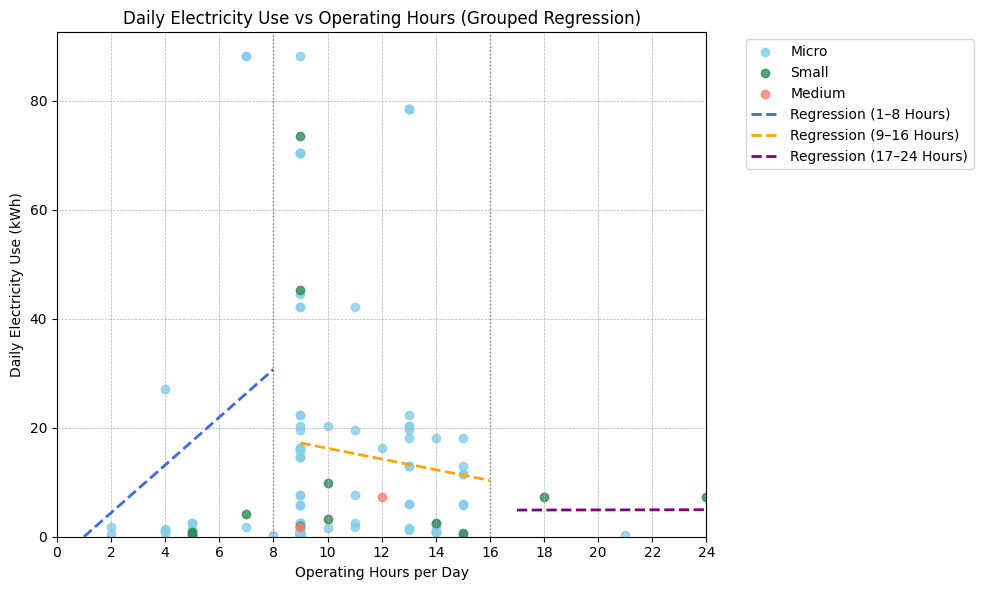

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your CSV
df = pd.read_csv("energyprofilesummarynooutlier.csv")

# --- Normalize business category
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Define color map for business category
category_colors = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Define color map for regression lines per hour group
regression_colors = {
    "1–8 Hours": "royalblue",
    "9–16 Hours": "orange",
    "17–24 Hours": "purple"
}

# --- Create the plot
plt.figure(figsize=(10, 6))

# --- Plot all points (circle markers), color-coded by business category
for category, color in category_colors.items():
    cat_df = df[df["business category"] == category]
    plt.scatter(cat_df["Number_of_Operation_hours"], cat_df["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Define hour groups and regression lines
hour_groups = [
    (1, 8, "1–8 Hours"),
    (9, 16, "9–16 Hours"),
    (17, 24, "17–24 Hours")
]

for min_hr, max_hr, label in hour_groups:
    group_df = df[(df["Number_of_Operation_hours"] >= min_hr) & (df["Number_of_Operation_hours"] <= max_hr)]
    if len(group_df) >= 2:
        m, b = np.polyfit(group_df["Number_of_Operation_hours"], group_df["DailyUsageKW"], 1)
        x_vals = np.array([min_hr, max_hr])
        y_vals = m * x_vals + b
        y_vals = np.maximum(y_vals, 0)  # Avoid negative y-values
        plt.plot(x_vals, y_vals, linestyle="--", linewidth=2,
                 label=f"Regression ({label})", color=regression_colors[label])

# --- Add dividers at 8 and 16 hours
for divider in [8, 16]:
    plt.axvline(x=divider, color='gray', linestyle=':', linewidth=1)

# --- Final plot settings
plt.xlabel("Operating Hours per Day")
plt.ylabel("Daily Electricity Use (kWh)")
plt.title("Daily Electricity Use vs Operating Hours (Grouped Regression)")
plt.xlim(0, 24)
plt.ylim(0)  # No negative y-values
plt.xticks(np.arange(0, 25, 2))  # Make sure 24 is visible
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Descriptive statistics
        Respondent_code  NoOfOperationDays  DailyUsageKW  \
count       129.000000         129.000000    129.000000   
mean         65.000000           6.410853     15.433818   
std          37.383151           0.956984     35.335025   
min           1.000000           3.000000      0.000000   
25%          33.000000           6.000000      0.775000   
50%          65.000000           7.000000      2.450000   
75%          97.000000           7.000000     16.200000   
max         129.000000           7.000000    330.600000   

       Cooling&VentilationUsage  Entertainment&AudioEquipmentUsage  \
count                129.000000                         129.000000   
mean                   2.194283                           0.872965   
std                    6.305547                           4.871937   
min                    0.000000                           0.000000   
25%                    0.037500                           0.000000   
50%                    0

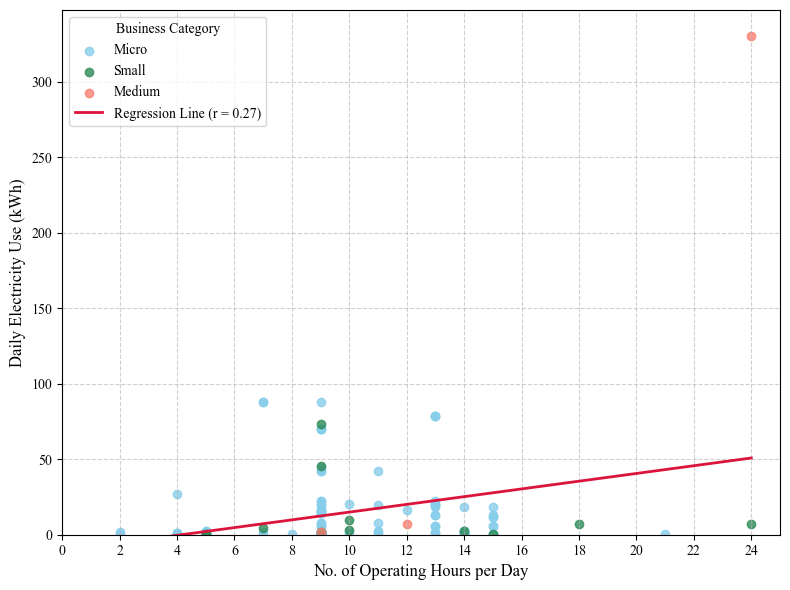

In [29]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

# --- Load your CSV 
df = pd.read_csv("energyprofilesummary.csv")  # with outlier
# df = pd.read_csv("energyprofilesummarynooutlier.csv")  # without outlier

# --- Clean and standardize category names
df["business category"] = df["Business_Category_(Asset):"].str.strip().str.lower()

# --- Basic descriptive statistics
print("Descriptive statistics\n", df.describe())

# --- Correlation analysis 
corr, p_val = pearsonr(df["Number_of_Operation_hours"], df["DailyUsageKW"])
print(f"\nPearson r = {corr:.3f}   p‑value = {p_val:.4g}")

# --- Define color map for business categories
color_map = {
    "micro": "skyblue",
    "small": "seagreen",
    "medium": "salmon"
}

# --- Plot setup
plt.figure(figsize=(8, 6))

# --- Scatter plot: color-coded by business category
for category, color in color_map.items():
    subset = df[df["business category"] == category]
    plt.scatter(subset["Number_of_Operation_hours"], subset["DailyUsageKW"],
                label=category.capitalize(), color=color, alpha=0.8)

# --- Global regression line (for all data)
m, b = np.polyfit(df["Number_of_Operation_hours"], df["DailyUsageKW"], 1)
x_vals = np.array([0, 24])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color="crimson", linewidth=2, label=f"Regression Line (r = {corr:.2f})")

# --- Labels and formatting
plt.xlabel("No. of Operating Hours per Day", fontsize=12)
plt.ylabel("Daily Electricity Use (kWh)", fontsize=12)
#plt.title("Daily Electricity Use vs No. of Operating Hours Per Day", fontsize=14)
plt.xlim(0, 25)           # Expand axis range
plt.xticks(np.arange(0, 25, 2))  # Show ticks from 0 to 24 only
plt.ylim(bottom=0)        # No negative y-values
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Business Category", loc='upper left')
plt.tight_layout()
plt.show()


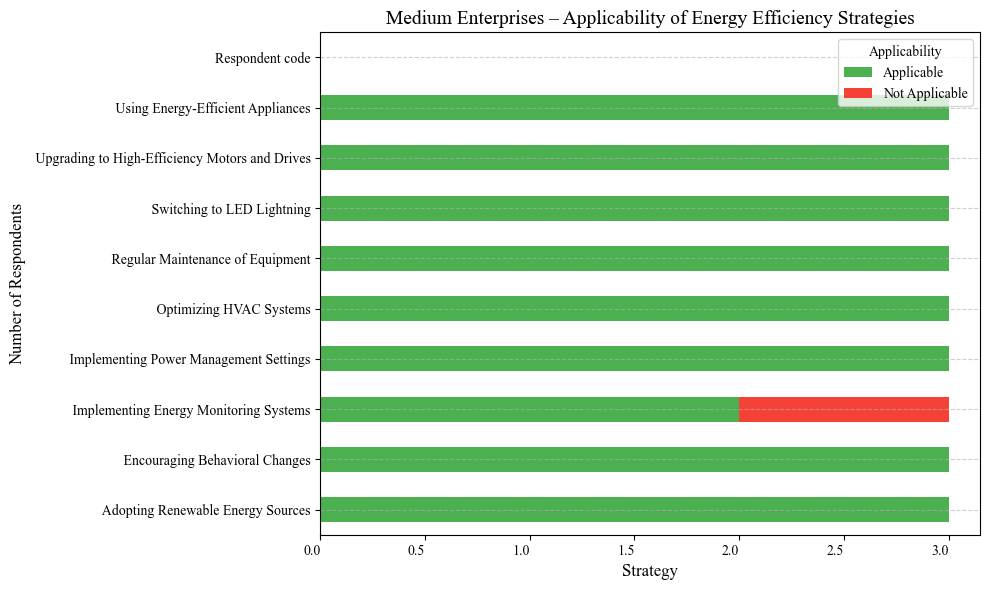

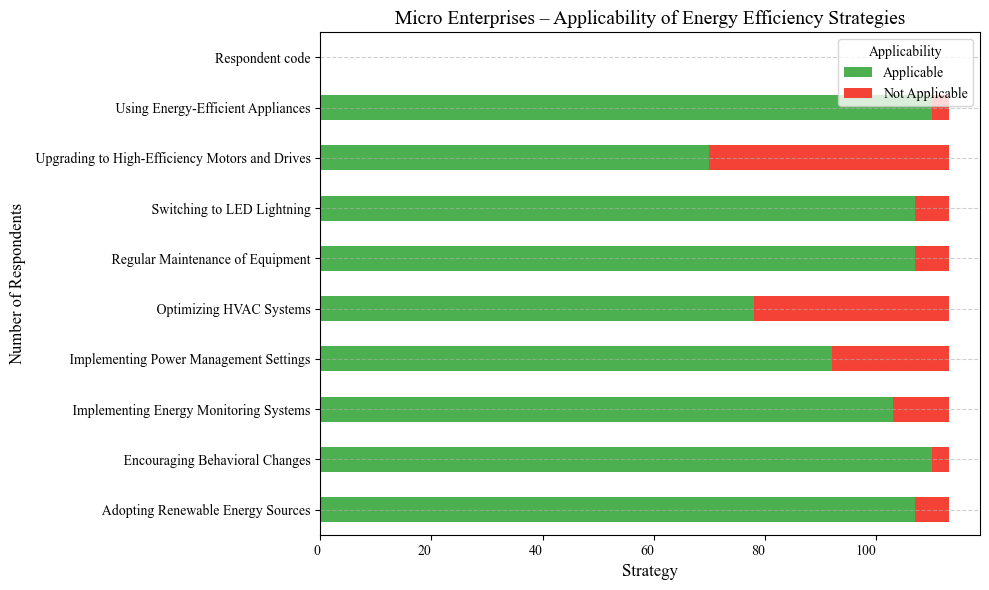

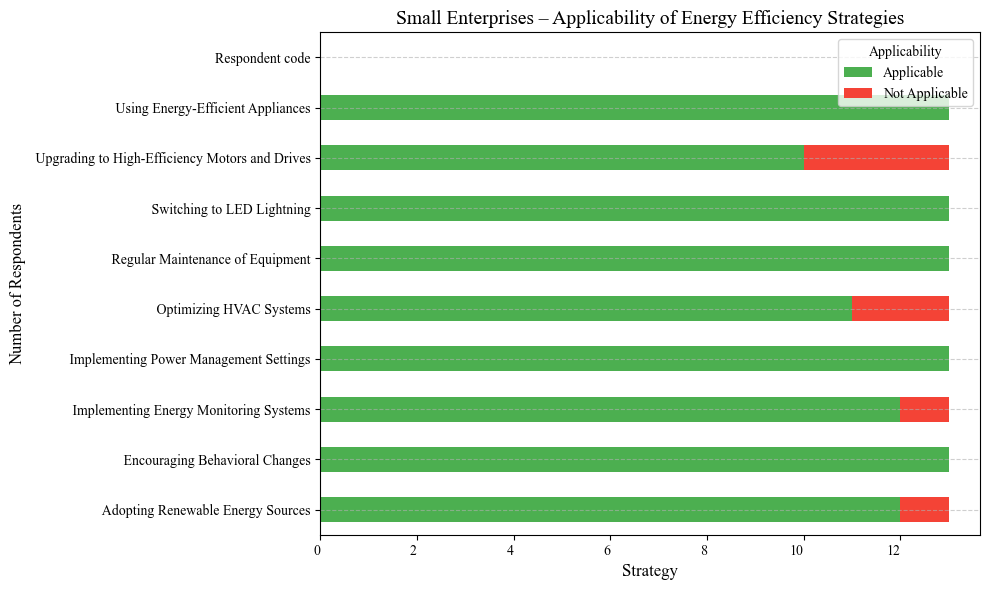

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_csv("opportunitiezss.csv")

# Melt the DataFrame to long format
df_melted = df.melt(id_vars=["Business Category"],
                    var_name="Strategy",
                    value_name="Applicability")



# Melt the DataFrame to long format (for strategy analysis)
df_melted = df.melt(id_vars=["Business Category"],
                    var_name="Strategy",
                    value_name="Applicability")

# Group the data: count of responses
grouped = df_melted.groupby(["Business Category", "Strategy", "Applicability"]).size().unstack(fill_value=0).reset_index()

# Set colors for consistency
colors = {"Applicable": "#4CAF50", "Not Applicable": "#F44336"}

# Get unique business categories
categories = grouped["Business Category"].unique()

# Plot each business category in a separate stacked bar chart
for category in categories:
    data = grouped[grouped["Business Category"] == category].set_index("Strategy")
    
    # Plot
    ax = data[["Applicable", "Not Applicable"]].plot(
        kind="barh", stacked=True, figsize=(10, 6),
        color=[colors["Applicable"], colors["Not Applicable"]]
    )
    
    # Title and labels
    plt.title(f"{category} Enterprises – Applicability of Energy Efficiency Strategies", fontsize=14)
    plt.xlabel("Strategy", fontsize=12)
    plt.ylabel("Number of Respondents", fontsize=12)
    plt.xticks(rotation=0, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title="Applicability", loc='upper right')
    plt.tight_layout()
    plt.show()



In [47]:
import pandas as pd

# Load the Excel file
df = pd.read_csv("opportunities.csv")

# Unpivot (melt) the practices into rows
df_melted = df.melt(id_vars=["Industry Type:", "Business Category"], 
                    var_name="Practice", 
                    value_name="Applicability")

# Filter only "Applicable" responses
df_applicable = df_melted[df_melted["Applicability"] == "Applicable"]

# Group by Practice and Industry Type, then count
summary_table = df_applicable.groupby(["Practice", "Industry Type:"]).size().unstack(fill_value=0)

# Optional: Save to Excel
summary_table.to_csv("summary_by_industry_applicable.csv")

# Show the result
print(summary_table)


Industry Type:                                  Agriculture  \
Practice                                                      
Adopting Renewable Energy Sources                         3   
Encouraging Behavioral Changes                            3   
Implementing Energy Monitoring Systems                    3   
Implementing Power Management Settings                    3   
Optimizing HVAC Systems                                   0   
Regular Maintenance of Equipment                          3   
Switching to LED Lightning                                3   
Upgrading to High-Efficiency Motors and Drives            3   
Using Energy-Efficient Appliances                         3   

Industry Type:                                  Food and beverages   \
Practice                                                              
Adopting Renewable Energy Sources                                40   
Encouraging Behavioral Changes                                   41   
Implementing Energy Mo

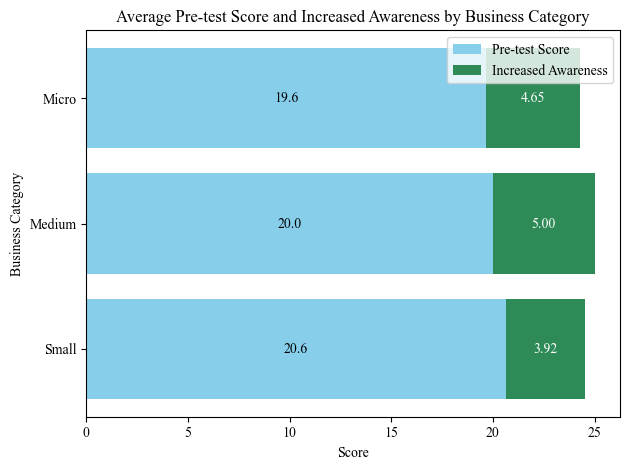

In [48]:
import matplotlib.pyplot as plt

# Data
categories = ['Small', 'Medium', 'Micro']
pretest_scores = [20.62, 20.00, 19.65]
increased_awareness = [3.92, 5.00, 4.65]

# Set up horizontal stacked bar chart
fig, ax = plt.subplots()

# Plotting
ax.barh(categories, pretest_scores, label='Pre-test Score', color='skyblue')
ax.barh(categories, increased_awareness, left=pretest_scores, label='Increased Awareness', color='seagreen')

# Labels and formatting
ax.set_xlabel('Score')
ax.set_ylabel('Business Category')
ax.set_title('Average Pre-test Score and Increased Awareness by Business Category')
ax.legend(loc='upper right')

# Display values on bars
for i in range(len(categories)):
    ax.text(pretest_scores[i] / 2, i, f"{pretest_scores[i]:.1f}", va='center', ha='center', color='black')
    ax.text(pretest_scores[i] + increased_awareness[i] / 2, i, f"{increased_awareness[i]:.2f}", va='center', ha='center', color='white')

plt.tight_layout()
plt.show()


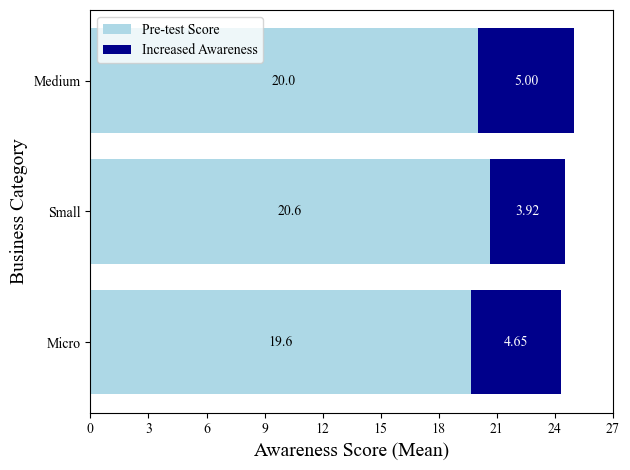

In [54]:
import matplotlib.pyplot as plt

# Data (order: Micro, Small, Medium)
categories = ['Micro', 'Small', 'Medium']
pretest_scores = [19.65, 20.62, 20.00]
increased_awareness = [4.65, 3.92, 5.00]

# Set up horizontal stacked bar chart
fig, ax = plt.subplots()

# Plotting with updated colors
ax.barh(categories, pretest_scores, label='Pre-test Score', color='#add8e6')       # Light blue
ax.barh(categories, increased_awareness, left=pretest_scores, label='Increased Awareness', color='#00008b')  # Dark blue

# Labels and formatting
ax.set_xlabel('Awareness Score (Mean)', fontsize = 14)
ax.set_ylabel('Business Category', fontsize = 14)
ax.set_xlim(0, 27)  # Ensure 27 is visible on x-axis
ax.set_xticks(range(0, 28, 3))  # Optional: show ticks every 3 units
ax.legend(loc='upper left')  # Legend inside top-left corner

# Display values on bars
for i in range(len(categories)):
    ax.text(pretest_scores[i] / 2, i, f"{pretest_scores[i]:.1f}", va='center', ha='center', color='black')
    ax.text(pretest_scores[i] + increased_awareness[i] / 2, i, f"{increased_awareness[i]:.2f}", va='center', ha='center', color='white')

plt.tight_layout()
plt.show()


